# Interpolación
## Introducción




## Lagrange interpolation
El polinomio de lagrange
$$ f_n(x) = \sum^n_{i=0} L_i(x) f(f_i)$$
donde:
$$ L_i(x) = \prod^n_{j=0 \bbox {..} j\neq 1}{\frac{x-x_j}{x_i-x_j}} $$

Ejemplo:
Si queremos utilizar el metodo de lagrange para interpolar los valores de 

$ x_0 = 1 \quad f(x_0) = 0$

$ x_1 = 4 \quad f(x_1) = 1.386294$

$ x_2 = 6 \quad f(x_2) = 1.791760$

El caso para una interpolacion para x = 2, podemos utilizar un polinomio lineal ($n=0$).

In [38]:
def L_i(n,i,x,X):
    resultado = 1;
    for j in range(n+1):
        #print(i,j)
        if(not j == i ):
            resultado = resultado * (x-X[j])/(X[i]-X[j])
    return resultado

def lagrange(n, x, X,F):
    resultado = 0
    for i in range(n+1):
        #print(i)
        resultado += L_i(n,i,x,X) * F[i]
    return resultado


In [66]:
X = [1, 4,6]
F = [0, 1.386294, 1.791760]
lagrange(1,2,X,F)

0.46209799999999995

In [40]:
lagrange(2,2, X,F)

0.5658439999999999

In [25]:
import numpy as np
import matplotlib.pylab as plt

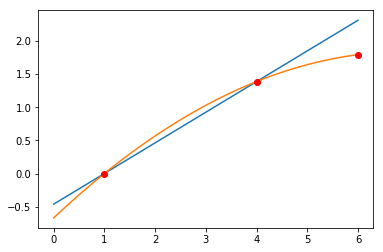

In [68]:
x_array = np.linspace(0,6)
f_1_array = np.array(list(map(lambda x:lagrange(1,x,X,F), x_array)))
f_2_array = np.array(list(map(lambda x:lagrange(2,x,X,F), x_array)))
#f_3_array = np.array(list(map(lambda x:lagrange(3,x,X,F), x_array)))

plt.Figure()
plt.plot(x_array, f_1_array)
plt.plot(x_array, f_2_array)
#plt.plot(x_array, f_3_array)
plt.plot(X,F,"or")

In [1]:
from ipywidgets import interact
@interact(n=(1, 9))
def f(n):
    X = np.linspace(0,4,10)
    F = np.sin(X)
    x_array = np.linspace(0,4)
    f_n_array = np.array(list(map(lambda x:lagrange(n,x,X,F), x_array)))
    plt.plot(x_array, f_n_array)
    plt.plot(X,F,"or")
    plt.ylim(-1.5,1.5)
    plt.show()

interactive(children=(IntSlider(value=5, description='n', max=9, min=1), Output()), _dom_classes=('widget-inte…

## Splines
### Splines cuadraticas
### Splines cubicas

## Interpolacion multidimensional
### Interpolacion bicubica

In [94]:
from ipywidgets import interact
@interact(n=(1, 10))
def f(n):
    X = np.linspace(0,5,10)
    F = np.sin(X)
    x_array = np.linspace(0,6)

    f_n_array = np.array(list(map(lambda x:lagrange(n,x,X,F), x_array)))

    plt.plot(x_array, f_n_array)

    plt.plot(X,F,"or")
    plt.ylim(-2,2)
    plt.show()

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

## Practicas
1)  